In [2]:
library(DESeq2)
library(enrichplot)
library(clusterProfiler)
library(ggplot2)
library(org.Hs.eg.db)
library(gridExtra)
library(grid)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [1]:
b_sgn_genes = readRDS('../../rds/b_sgn_genes.rds')
#gundiff_go = readRDS('../../rds/gundiff_go.rds')
deseq2_brain_mockvirus = readRDS('../../rds/deseq2_brain_mockvirus.rds')

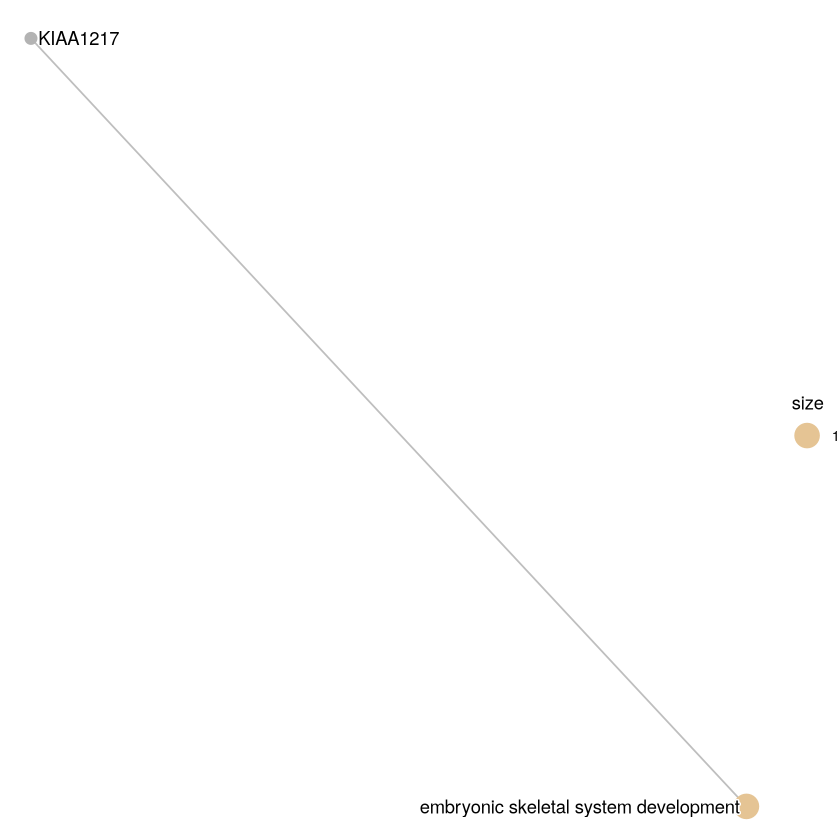

In [3]:
# create the enrichGO object (ego)
ego_MLB2 <- enrichGO(gene = b_sgn_genes$MLB2, 
                OrgDb = org.Hs.eg.db,     # Replace with your organism database
                keyType = "ENSEMBL",      # Or another keyType like "SYMBOL"
                ont = "BP",               # Biological Process GO terms
                pAdjustMethod = "BH",     # Benjamini-Hochberg adjustment
                qvalueCutoff = 0.05,      # Adjust the p-value cutoff as needed
                readable = TRUE)

# Now, use cnetplot with the enrichGO result (ego)
cnetplot(ego_MLB2, categorySize = "pvalue")

# less strict
ego_MLB2 <- enrichGO(
    gene = gundiff_sgn_genes$MLB2, 
    OrgDb = org.Hs.eg.db, 
    keyType = "ENSEMBL",
    ont = "BP",
    pAdjustMethod = "none",  # Try removing multiple testing correction
    pvalueCutoff = 0.1,  # Allow more GO terms
    qvalueCutoff = 0.2,  # Less strict threshold
    readable = TRUE
)
summary(ego_MLB2)


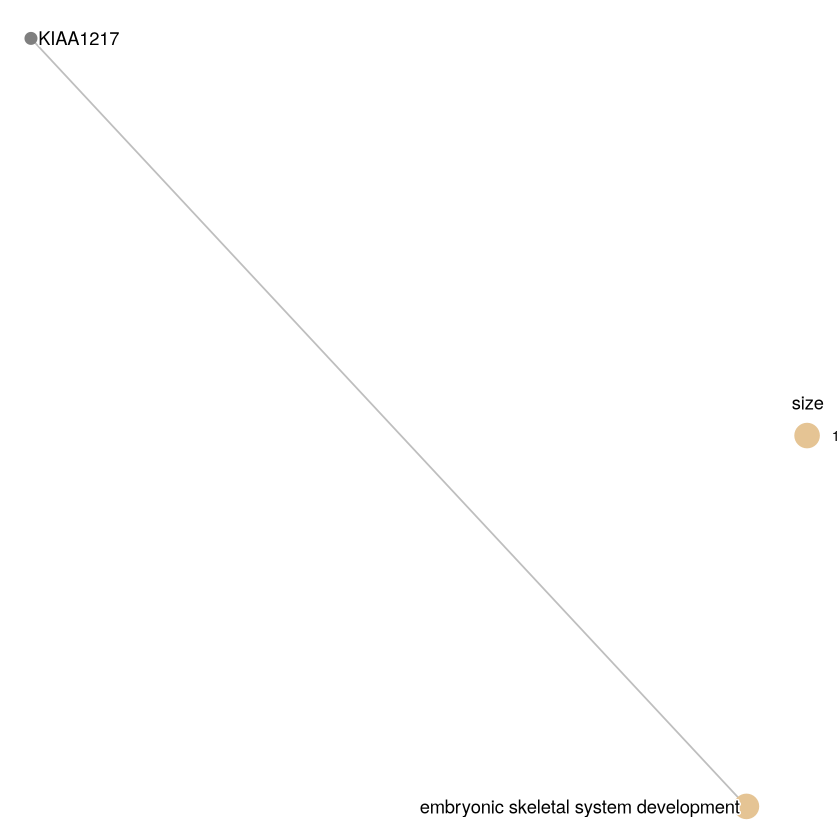

In [4]:
log2FC_MLB2 <- deseq2_brain_mockvirus$MLB2$log2FoldChange
cnetplot(ego_MLB2, categorySize = "pvalue", foldChange = log2FC_MLB2)

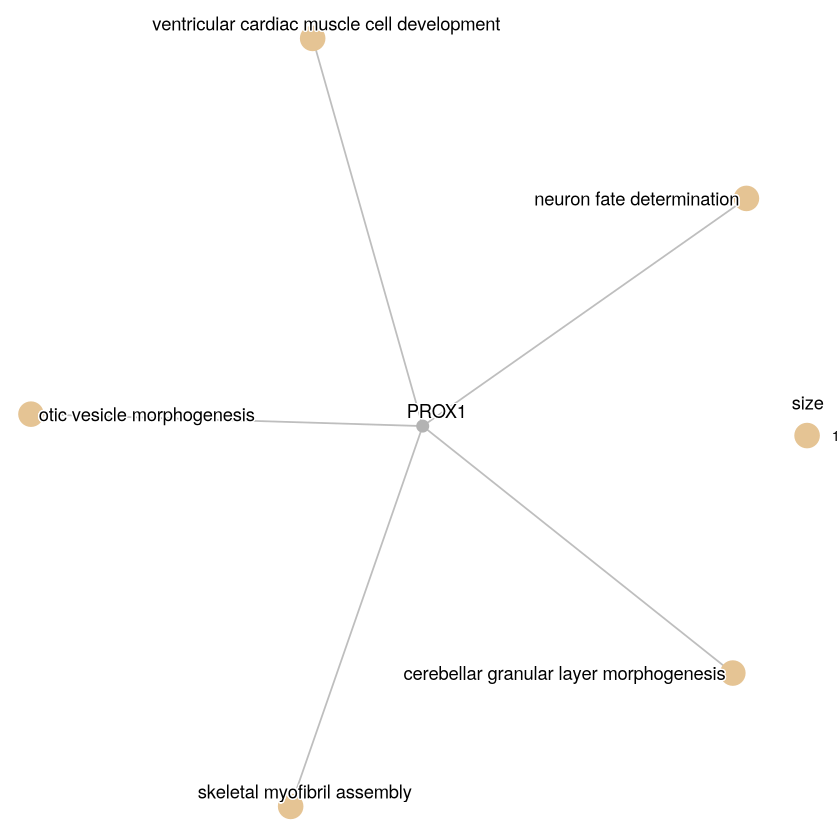

In [5]:
# create the enrichGO object (ego)
ego_VA1 <- enrichGO(gene = b_sgn_genes$VA1, 
                OrgDb = org.Hs.eg.db,     # Replace with your organism database
                keyType = "ENSEMBL",      # Or another keyType like "SYMBOL"
                ont = "BP",               # Biological Process GO terms
                pAdjustMethod = "BH",     # Benjamini-Hochberg adjustment
                qvalueCutoff = 0.05,      # Adjust the p-value cutoff as needed
                readable = TRUE)

# Now, use cnetplot with the enrichGO result (ego)
cnetplot(ego_VA1, categorySize = "pvalue")


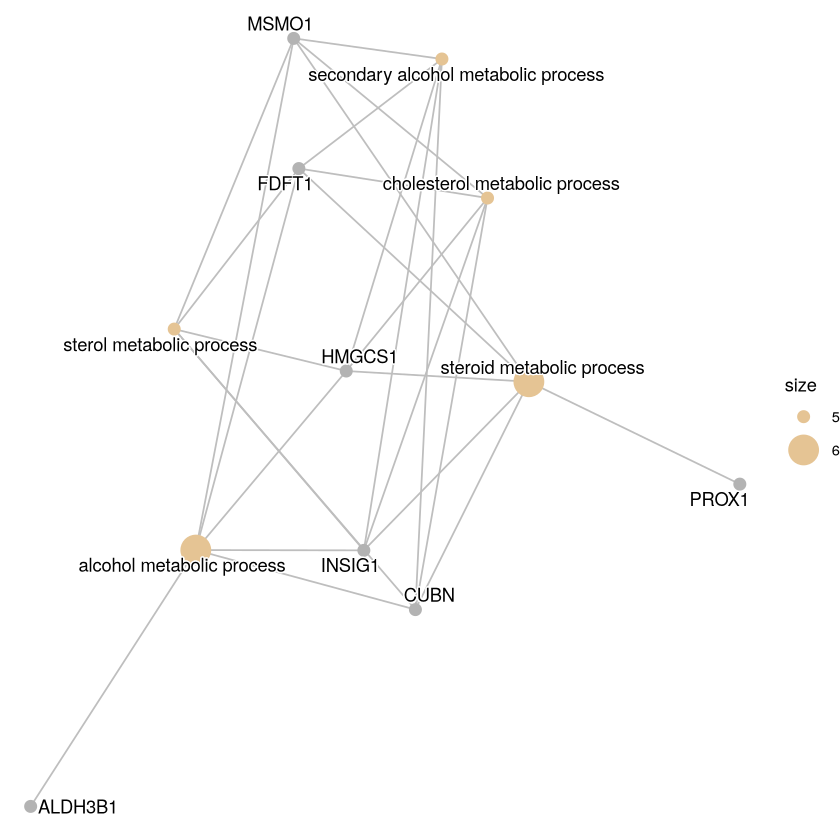

In [6]:
# create the enrichGO object (ego)
ego_HAstV4 <- enrichGO(gene = b_sgn_genes$HAstV4, 
                OrgDb = org.Hs.eg.db,     # Replace with your organism database
                keyType = "ENSEMBL",      # Or another keyType like "SYMBOL"
                ont = "BP",               # Biological Process GO terms
                pAdjustMethod = "BH",     # Benjamini-Hochberg adjustment
                qvalueCutoff = 0.05,      # Adjust the p-value cutoff as needed
                readable = TRUE)

# Now, use cnetplot with the enrichGO result (ego)
cnetplot(ego_HAstV4, categorySize = "pvalue")

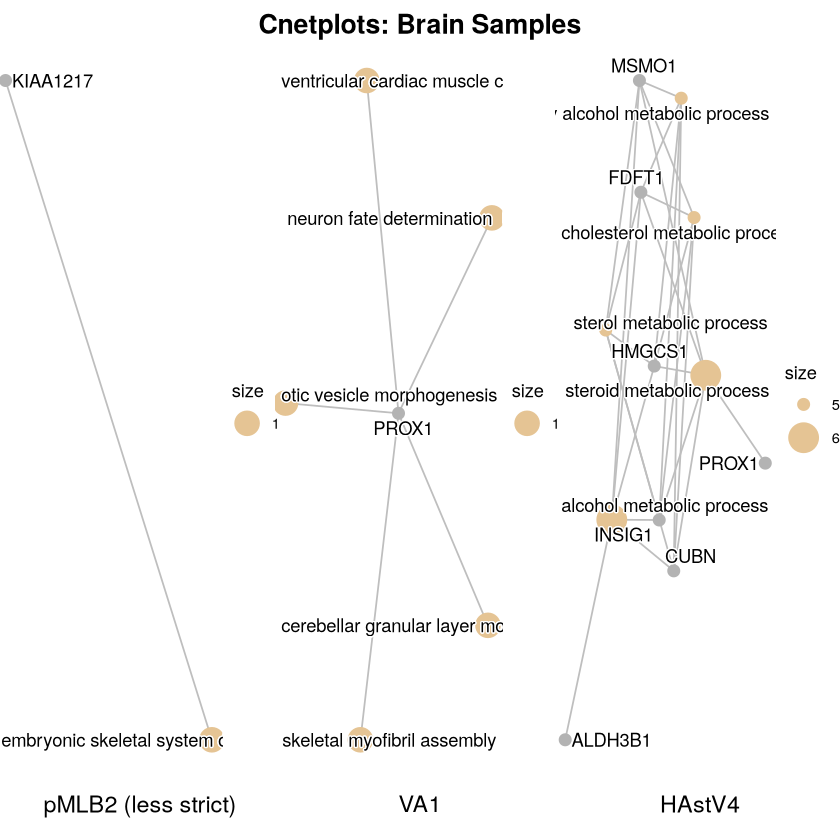

In [7]:
# Create the plots
plot_MLB2 <- cnetplot(ego_MLB2, categorySize = "pvalue")
plot_VA1  <- cnetplot(ego_VA1, categorySize = "pvalue")
plot_HAstV4 <- cnetplot(ego_HAstV4, categorySize = "pvalue")

# Create labels for each plot
label_MLB2 <- textGrob("pMLB2 (less strict)", gp = gpar(fontsize = 14))
label_VA1  <- textGrob("VA1", gp = gpar(fontsize = 14))
label_HAstV4 <- textGrob("HAstV4", gp = gpar(fontsize = 14))

# Arrange the plots and their labels
plots_grid <- arrangeGrob(
  plot_MLB2, plot_VA1, plot_HAstV4,
  label_MLB2, label_VA1, label_HAstV4,
  ncol = 3, nrow = 2, 
  heights = c(2, 0.2)  # First row: plots, second row: labels
)

# Create the title
title <- textGrob("Cnetplots: Brain Samples", gp = gpar(fontsize = 16, fontface = "bold"))

# Arrange everything together
grid.arrange(title, plots_grid, ncol = 1, heights = c(0.3, 5))

# Adjust plot size
options(repr.plot.width = 30, repr.plot.height = 12)


In [8]:
pdf("../../figures/brain/08_cnetplots_brain.pdf", width = 15, height = 6)  # Adjust width & height
grid.draw(grid.arrange(title, plots_grid, ncol = 1, heights = c(0.3, 5)))
dev.off()

pdf 
  2